In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

In [2]:
#Reading data without outliers
df = pd.read_csv('credit_data_process-2.csv')
df.head()

,Unnamed: 0,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
0,1,2,12,128,1,1,4,0,23.0,19114.12,...,0.0,31.033317,11.270000,4.0,809.98,31.944960,49.574949,118.280222,284.629163,220.840847
1,2,6,12,128,1,1,5,0,0.0,19114.12,...,3.0,7.000000,10.389016,4.0,809.98,28.609352,49.574949,81.699521,331.209863,267.000000
2,3,0,12,128,1,1,6,0,23.0,19114.12,...,5.0,4.000000,6.270000,4.0,809.98,31.377862,49.574949,199.458074,223.451310,268.000000
3,4,7,12,128,1,1,2,0,23.0,19114.12,...,6.0,31.033317,11.270000,4.0,809.98,24.797347,49.574949,41.420153,341.489231,269.000000
4,5,5,12,128,1,1,0,0,23.0,19114.12,...,8.0,4.000000,9.270000,4.0,809.98,27.262259,49.574949,62.430172,340.479212,270.000000


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
# Selecting Top 10 features from the feature selection
# Top 10 features
# 1. Outstanding_Debt  
# 2. Annual_Income
# 3. Total_EMI_per_month 
# 4. Type_of_Loan
# 5. Interest_Rate
# 6. Credit_Mix
# 7. Delay_from_due_date  
# 8. Num_Credit_Inquiries
# 9. Payment_of_Min_Amount 
# 10. Num_Credit_Card 

In [5]:
df_1 = df[['Type_of_Loan', 'Credit_Mix', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month','Credit_Score']]

In [7]:
X = df_1.drop(['Credit_Score'],axis=1)
y = df_1['Credit_Score']

In [8]:
#Standard scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)
scaled_X

array([[-1.7888018 , -0.57099889, -0.83922729, ..., -0.48495986,
        -0.54700544, -0.55944491],
       [-1.7888018 , -0.57099889, -0.83922729, ..., -0.48495986,
        -0.54700544, -0.55944491],
       [-1.7888018 , -0.57099889, -0.83922729, ..., -0.48495986,
        -0.54700544, -0.55944491],
       ...,
       [-1.465073  , -0.57099889, -0.28305876, ..., -0.72902009,
        -0.83300109, -0.69788081],
       [-1.465073  , -0.57099889, -0.28305876, ..., -0.72902009,
        -0.83300109, -0.69788081],
       [-1.465073  , -0.57099889, -0.33940117, ..., -0.72902009,
        -0.83300109, -0.69788081]])

In [9]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,y, train_size=0.5,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [10]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(49999, 10)
(49999,)
(25000, 10)
(25000,)
(25000, 10)
(25000,)


(None, None)

# Decision Trees

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, recall_score
from sklearn import tree

In [16]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
#random model on the validation dataset
y_valid_pred = model.predict(X_valid)
acc = accuracy_score(y_valid,y_valid_pred)

print(f"The accuracy for the model is {acc}")

The accuracy for the model is 0.70732


In [20]:
#How accuracy is changing with the Depth of the tree
max_depth = []
acc_gini  = []
acc_entropy = []
for i in range(1, 40):
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_gini.append(accuracy_score(y_pred,y_valid))

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_entropy.append(accuracy_score(y_pred,y_valid))

    max_depth.append(i)
    
d = pd.DataFrame({'max_depth': max_depth,
                  'acc_gini': acc_gini,
                  'acc_entropy': acc_entropy})
d

,max_depth,acc_gini,acc_entropy
0,1,0.60728,0.60808
1,2,0.64024,0.64132
2,3,0.66120,0.66232
3,4,0.66464,0.66168
4,5,0.68468,0.68040
5,6,0.68600,0.68276
6,7,0.69364,0.68796
7,8,0.69408,0.68952
8,9,0.69500,0.68936
9,10,0.69904,0.69484


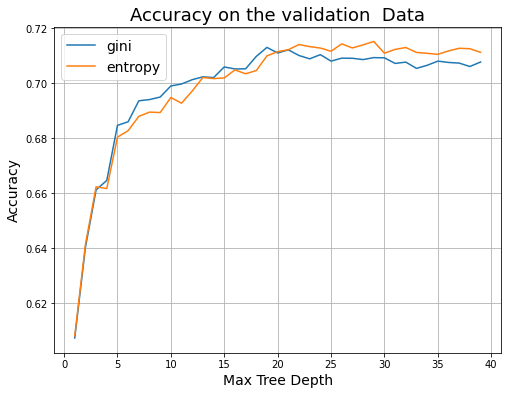

In [22]:
plt.figure(figsize = (8, 6))

plt.plot(d.max_depth, d.acc_gini, label='gini')
plt.plot(d.max_depth, d.acc_entropy, label='entropy')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy on the validation  Data', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

In [27]:
#How Accuracy changing with min_samples_split
min_sample_split = []
acc_gini  = []
acc_entropy = []
for i in range(2, 30):
    model = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_gini.append(accuracy_score(y_pred,y_valid))

    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_entropy.append(accuracy_score(y_pred,y_valid))

    min_sample_split.append(i)
    
r = pd.DataFrame({'min_sample_split': min_sample_split,
                  'acc_gini': acc_gini,
                  'acc_entropy': acc_entropy})
r

,min_sample_split,acc_gini,acc_entropy
0,2,0.70696,0.71364
1,3,0.70704,0.71200
2,4,0.70504,0.71032
3,5,0.70624,0.71108
4,6,0.70692,0.71164
5,7,0.70452,0.71064
6,8,0.70396,0.71036
7,9,0.70436,0.70924
8,10,0.70200,0.70896
9,11,0.70300,0.70912


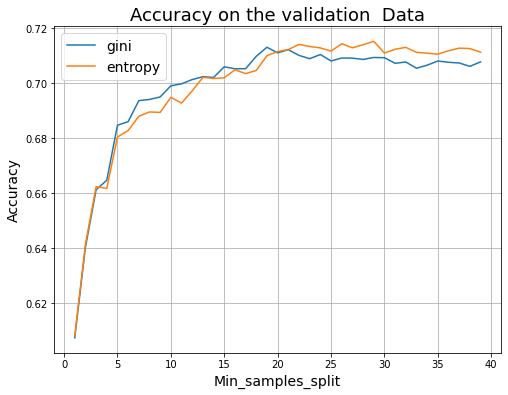

In [28]:
plt.figure(figsize = (8, 6))

plt.plot(d.max_depth, d.acc_gini, label='gini')
plt.plot(d.max_depth, d.acc_entropy, label='entropy')
plt.xlabel('Min_samples_split', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy on the validation  Data', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

# finding best parameters using grid search

In [29]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                 param_grid={'max_depth': range(1, 21),
                             'min_samples_split': range(2, 20),
                             'criterion': ['gini', 'entropy']},
                 cv=10,
                 scoring="accuracy")
gs_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 20)},
             scoring='accuracy')

In [30]:
gs_model.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}

In [32]:
best_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_split= 2)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [34]:
# best model on the validation dataset
y_valid_pred = best_model.predict(X_valid)
acc = accuracy_score(y_valid,y_valid_pred)

print(f"The accuracy for the model is {acc}")

The accuracy for the model is 0.71148


In [36]:
# best model on the test dataset
y_test_pred = best_model.predict(X_test)
acc = accuracy_score(y_test,y_test_pred)
print(f"The accuracy for the model is {acc}")

The accuracy for the model is 0.70892


In [37]:
# Confusion matrx for the model
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[2753  200 1464]
 [ 307 5155 1775]
 [1548 1983 9815]]


In [38]:
#Classification Report for the model
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      4417
           1       0.70      0.71      0.71      7237
           2       0.75      0.74      0.74     13346

    accuracy                           0.71     25000
   macro avg       0.68      0.69      0.69     25000
weighted avg       0.71      0.71      0.71     25000



# PCA model

In [4]:
#Reading pca data 
df = pd.read_csv('Credit_data_PCA.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Credit_Score
0,0,-0.136363,-0.370934,0.041678,0.263842,-0.222105,0.292258,0.251458,-0.438477,-0.190560,...,0.547227,-0.097278,-0.341116,-0.124602,-0.107184,-0.040613,-0.066402,0.042967,0.056982,0
1,1,-0.226325,-0.463382,0.151887,0.296798,0.345578,0.304052,0.211837,-0.472029,-0.316839,...,-0.020493,-0.073904,-0.188365,-0.469507,0.041760,-0.076142,-0.225868,-0.041018,0.090555,0
2,2,-0.273298,-0.478896,0.422737,0.295270,-0.517704,0.286965,0.194752,-0.482383,-0.322554,...,-0.117989,0.019139,-0.105781,-0.162512,-0.098846,-0.021087,-0.085814,-0.016029,0.084190,0
3,3,-0.126936,-0.375277,-0.303028,0.312867,0.500363,0.306469,0.272134,-0.428103,-0.231405,...,0.576941,0.048185,-0.210290,-0.179118,0.028326,-0.181783,-0.088332,0.009019,0.133855,0
4,4,-0.337219,-0.249693,-0.537153,0.358871,0.219459,0.308859,0.244402,-0.453667,-0.368670,...,-0.019088,0.321884,-0.029550,-0.192756,-0.054961,-0.077647,-0.081890,-0.034598,0.105237,0


In [5]:
X = df.drop(['Credit_Score','Unnamed: 0'],axis=1)
y = df['Credit_Score']

In [6]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.5,random_state=42)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(49999, 19)
(49999,)
(25000, 19)
(25000,)
(25000, 19)
(25000,)


(None, None)

In [7]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
#random model on the validation dataset
y_valid_pred = model.predict(X_valid)
acc = accuracy_score(y_valid,y_valid_pred)

print(f"The accuracy for the model is {acc}")

The accuracy for the model is 0.58024


In [11]:
#How accuracy is changing with the Depth of the tree
max_depth = []
acc_gini  = []
acc_entropy = []
for i in range(1, 40):
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_gini.append(accuracy_score(y_pred,y_valid))

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_entropy.append(accuracy_score(y_pred,y_valid))

    max_depth.append(i)
    
d = pd.DataFrame({'max_depth': max_depth,
                  'acc_gini': acc_gini,
                  'acc_entropy': acc_entropy})
d

,max_depth,acc_gini,acc_entropy
0,1,0.60316,0.60308
1,2,0.60316,0.60308
2,3,0.62140,0.61820
3,4,0.64024,0.62872
4,5,0.64528,0.64144
5,6,0.65520,0.65044
6,7,0.65732,0.65344
7,8,0.65728,0.65396
8,9,0.65396,0.65032
9,10,0.65332,0.64680


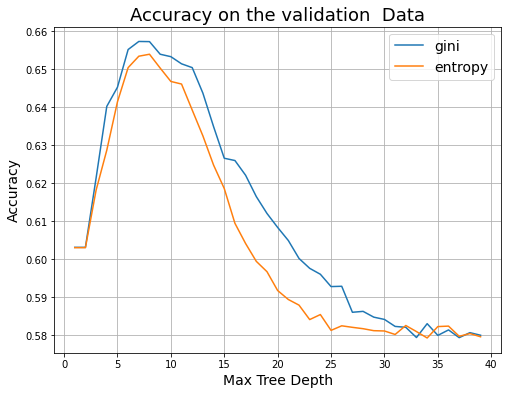

In [12]:
plt.figure(figsize = (8, 6))

plt.plot(d.max_depth, d.acc_gini, label='gini')
plt.plot(d.max_depth, d.acc_entropy, label='entropy')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy on the validation  Data', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

In [13]:
#How Accuracy changing with min_samples_split
min_sample_split = []
acc_gini  = []
acc_entropy = []
for i in range(2, 30):
    model = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_gini.append(accuracy_score(y_pred,y_valid))

    model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_entropy.append(accuracy_score(y_pred,y_valid))

    min_sample_split.append(i)
    
r = pd.DataFrame({'min_sample_split': min_sample_split,
                  'acc_gini': acc_gini,
                  'acc_entropy': acc_entropy})
r

,min_sample_split,acc_gini,acc_entropy
0,2,0.57792,0.58040
1,3,0.57852,0.58024
2,4,0.57896,0.58144
3,5,0.57884,0.58000
4,6,0.57696,0.57820
5,7,0.57868,0.57588
6,8,0.57860,0.57588
7,9,0.58016,0.57852
8,10,0.58192,0.57712
9,11,0.58164,0.57796


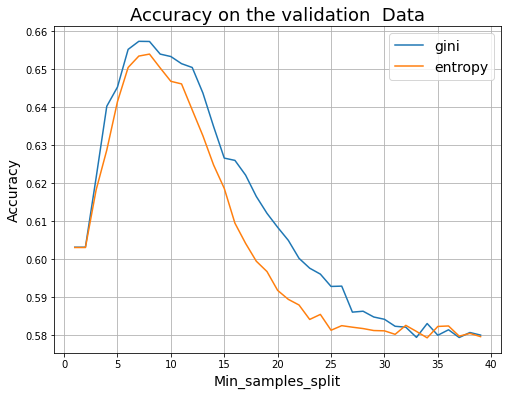

In [14]:
plt.figure(figsize = (8, 6))

plt.plot(d.max_depth, d.acc_gini, label='gini')
plt.plot(d.max_depth, d.acc_entropy, label='entropy')
plt.xlabel('Min_samples_split', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy on the validation  Data', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

# finding best parameters using grid search

In [8]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                 param_grid={'max_depth': range(1, 21),
                             'min_samples_split': range(2, 20),
                             'criterion': ['gini', 'entropy']},
                 cv=5,
                 scoring="accuracy")
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 20)},
             scoring='accuracy')

In [9]:
gs_model.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 14}

In [10]:
best_model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_split= 14)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=14)

In [11]:
# best model on the validation dataset
y_valid_pred = best_model.predict(X_valid)
acc = accuracy_score(y_valid,y_valid_pred)

print(f"The accuracy for the model is {acc}")

The accuracy for the model is 0.65388


In [14]:
#best model on the test dataset
y_test_pred = best_model.predict(X_test)
acc = accuracy_score(y_test,y_test_pred)
print(f"The accuracy for the model is {acc}")

The accuracy for the model is 0.6504


In [15]:
# Confusion matrx for the model
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[2929   55 1433]
 [ 814 3938 2485]
 [2191 1762 9393]]


In [16]:
#Classification Report for the model
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.49      0.66      0.57      4417
           1       0.68      0.54      0.61      7237
           2       0.71      0.70      0.70     13346

    accuracy                           0.65     25000
   macro avg       0.63      0.64      0.63     25000
weighted avg       0.66      0.65      0.65     25000

